In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("/Users/emmaolsen/Library/CloudStorage/OneDrive-Aarhusuniversitet/cognitive_science/5th_semester/bachelor/anew-1999/wordlist_nlp.csv", sep=',')
xanew = pd.read_csv("/Users/emmaolsen/Library/CloudStorage/OneDrive-Aarhusuniversitet/cognitive_science/5th_semester/bachelor/anew-1999/Ratings_Warriner_et_al.csv", sep=',')

In [30]:
# rename V.Mean.Sum column to Valence
data.rename(columns={'V.Mean.Sum': 'Valence'}, inplace=True)
xanew.rename(columns={'V.Mean.Sum': 'Valence'}, inplace=True)

data.rename(columns={'A.Mean.Sum': 'Arousal'}, inplace=True)
xanew.rename(columns={'A.Mean.Sum': 'Arousal'}, inplace=True)

In [24]:
display(data)

,word,...1.x,sem_group,...1.y,Valence,V.SD.Sum,V.Rat.Sum,Arousal,A.SD.Sum,A.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
0,abyss,249,0,46,3.90,1.51,21,4.85,2.41,20,...,14,5.50,0.84,6,3.42,2.57,12,4.78,2.77,9
1,accident,136,10,61,2.55,1.25,42,4.93,2.56,43,...,24,4.74,2.42,19,2.85,2.31,26,3.18,1.89,22
2,accordion,121,5,71,5.26,2.08,19,2.94,2.21,18,...,12,3.00,2.76,6,5.27,2.25,15,5.11,1.96,9
3,act,35,11,105,5.64,1.71,22,4.19,2.29,21,...,6,4.00,1.81,15,5.70,2.21,10,6.62,1.77,8
4,actor,142,7,113,6.15,1.27,20,4.35,2.28,20,...,12,4.12,2.17,8,5.64,2.29,11,5.64,1.75,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,woman,225,7,13788,7.09,1.44,22,3.80,2.40,20,...,6,4.36,2.50,14,6.62,2.07,8,5.14,1.46,7
279,wonder,262,9,13792,6.68,1.70,22,4.38,2.60,21,...,6,4.00,2.20,15,6.80,2.97,10,6.00,1.93,8
280,worker,36,7,13811,5.95,1.47,20,3.60,2.01,20,...,10,3.60,2.32,10,6.47,2.07,17,5.86,1.46,7
281,world,176,2,13820,6.46,1.57,39,4.55,2.30,42,...,25,4.24,1.92,17,5.38,2.63,16,4.96,2.41,25


In [33]:
# subset data only with word, valence and arousal column
data_sub = data[['word', 'Valence', 'Arousal']]
xanew_sub = xanew[['Word', 'Valence', 'Arousal']]

In [41]:
# rename word column in data_sub to Word
data_sub = data_sub.rename(columns={'word': 'Word'})

In [40]:
# add source column to data_sub with value "our_data"
data_sub['Source'] = 'our_data'
xanew_sub['Source'] = 'xanew'

<ipython-input-40-edfc209ecb72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xanew_sub['Source'] = 'xanew'


In [45]:
# concat data_sub and xanew_sub 
data_concat = pd.concat([data_sub, xanew_sub])

In [48]:
data_concat

,Word,Valence,Arousal,Source
0,abyss,3.90,4.85,our_data
1,accident,2.55,4.93,our_data
2,accordion,5.26,2.94,our_data
3,act,5.64,4.19,our_data
4,actor,6.15,4.35,our_data
...,...,...,...,...
13910,zone,4.75,3.78,xanew
13911,zoning,4.65,3.77,xanew
13912,zoo,7.00,5.63,xanew
13913,zoom,5.86,5.68,xanew


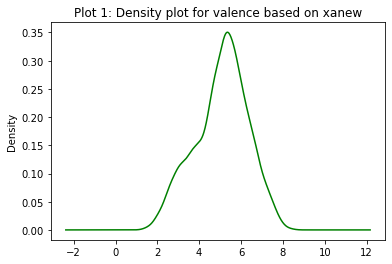

In [56]:
# Plot 1: Valence density plot based on xanew_sub and data_sub
xanew_sub.Valence.plot.density(color="green")
plt.title('Plot 1: Density plot for valence based on xanew')
plt.show()

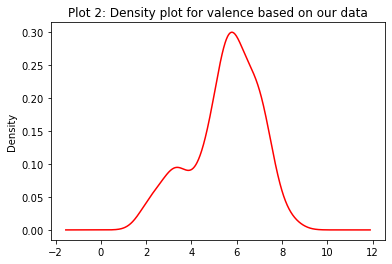

In [55]:
# Plot 2: Valence density plot based on data_sub
data_sub.Valence.plot.density(color="red")
plt.title('Plot 2: Density plot for valence based on our data')
plt.show()

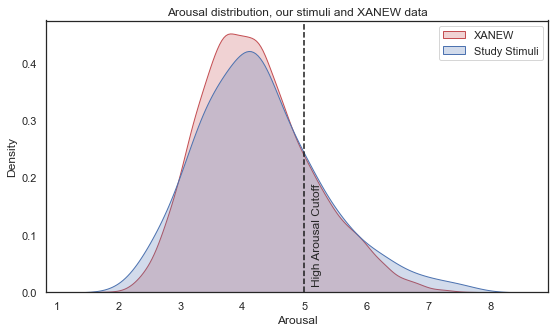

In [118]:
# Arousal

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="white",rc={"figure.figsize":(9,5)})

# plotting both distibutions on the same figure
fig = sns.kdeplot(xanew_sub['Arousal'], shade=True, color="r")
fig = sns.kdeplot(data_sub['Arousal'], shade=True, color="b")


# add legend 
fig.legend(labels=['XANEW', 'Study Stimuli'])

# add title
fig.set_title("Arousal distribution, our stimuli and XANEW data")

# add vertical lines at x=3 and x = 6
fig.axvline(5, color='k', linestyle='--')


# add text to the vertical lines
fig.text(5.2, 0.1, 'High Arousal Cutoff', horizontalalignment='center', verticalalignment='center', rotation=90)


plt.show()

fig = fig.get_figure()
fig.savefig("arousal_dens.png")


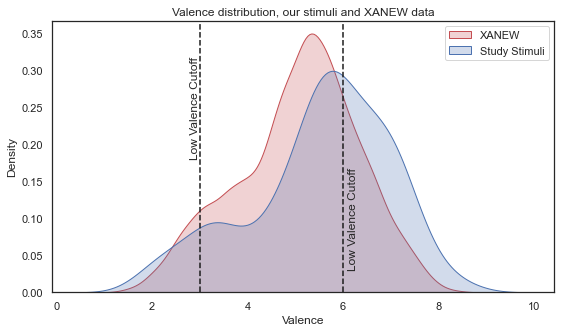

In [119]:
# Valence plot

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="white",rc={"figure.figsize":(9,5)})

# plotting both distibutions on the same figure
fig = sns.kdeplot(xanew_sub['Valence'], shade=True, color="r")
fig = sns.kdeplot(data_sub['Valence'], shade=True, color="b")


# add legend 
fig.legend(labels=['XANEW', 'Study Stimuli'])

# add title
fig.set_title("Valence distribution, our stimuli and XANEW data")

# add vertical lines at x=3 and x = 6
fig.axvline(3, color='k', linestyle='--')
fig.axvline(6, color='k', linestyle='--')


# add text to the vertical lines
fig.text(2.9, 0.25, 'Low Valence Cutoff', horizontalalignment='center', verticalalignment='center', rotation=90)
fig.text(6.2, 0.1, 'Low Valence Cutoff', horizontalalignment='center', verticalalignment='center', rotation=90)


plt.show()

fig = fig.get_figure()
fig.savefig("valence_dens.png")
